To investigate if different planes, identified by their tail number, have different speeds.

This can take the plane's flight time divided by distance travelled

In [3]:
import pandas as pd
import pgaccess as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
planeSpeed = pg.execute_query('''
SELECT
    tail_num,
    AVG(air_time) AS air_time,
    AVG(distance) AS distance,
    AVG(air_time / distance) AS speed,
    COUNT(*) AS flight_count
FROM flights
GROUP BY tail_num
''')
planeSpeed.dropna(inplace=True)
planeSpeed

,tail_num,air_time,distance,speed,flight_count
0,215NV,122.756602,919.035134,0.135550,2277
1,216NV,112.813073,834.327661,0.136934,2527
2,217NV,112.968868,836.285536,0.136634,2399
3,218NV,110.383200,811.747909,0.137556,2511
4,219NV,113.106349,840.977039,0.135968,2526
...,...,...,...,...,...
6482,N999DN,68.696488,450.422938,0.162036,3601
6483,N999FR,161.750000,1177.000000,0.138531,8
6484,N999JB,165.207547,1223.937888,0.135870,161
6485,N999JQ,172.113022,1304.009650,0.133334,829


We can do a plot to see if there's an overally pattern to speeds

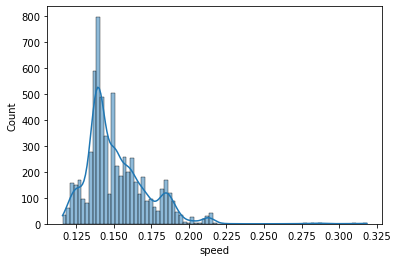

In [4]:
sns.histplot(planeSpeed.speed, kde=True)
plt.show()

So there is some variation in average plane speeds. How about seeing if there are any planes with very few flights and cutting them out

In [7]:
manyFlights = planeSpeed[planeSpeed.flight_count > 100]
manyFlights

,tail_num,air_time,distance,speed,flight_count
0,215NV,122.756602,919.035134,0.135550,2277
1,216NV,112.813073,834.327661,0.136934,2527
2,217NV,112.968868,836.285536,0.136634,2399
3,218NV,110.383200,811.747909,0.137556,2511
4,219NV,113.106349,840.977039,0.135968,2526
...,...,...,...,...,...
6480,N998JE,170.753530,1287.572519,0.133837,786
6481,N998NN,145.015665,1072.299003,0.142223,2408
6482,N999DN,68.696488,450.422938,0.162036,3601
6484,N999JB,165.207547,1223.937888,0.135870,161


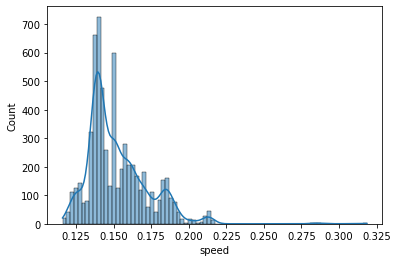

In [8]:
sns.histplot(manyFlights.speed, kde=True)
plt.show()

Surprisingly the distribution actually looks about the same. Maybe be even more restrictive and drop flights with less than a certain amount of flights based on the distribution of flight counts

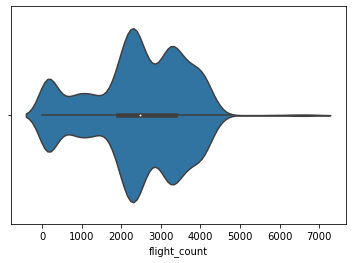

In [9]:
sns.violinplot(x=planeSpeed.flight_count)
plt.show()

Actually I see the reasonable distribution of flights goes pretty much right down to 0. So picking a number visually I think 1500 is probably a decent place to put the cut-off. Just above there is where a really large number of planes have so many flights.

In [10]:
flightRestricted = planeSpeed[planeSpeed.flight_count > 1500]
flightRestricted

,tail_num,air_time,distance,speed,flight_count
0,215NV,122.756602,919.035134,0.135550,2277
1,216NV,112.813073,834.327661,0.136934,2527
2,217NV,112.968868,836.285536,0.136634,2399
3,218NV,110.383200,811.747909,0.137556,2511
4,219NV,113.106349,840.977039,0.135968,2526
...,...,...,...,...,...
6476,N998AN,162.344228,1239.012490,0.138428,2482
6477,N998AT,85.782622,583.259492,0.157645,3345
6478,N998DL,68.527544,448.025483,0.162293,3571
6481,N998NN,145.015665,1072.299003,0.142223,2408


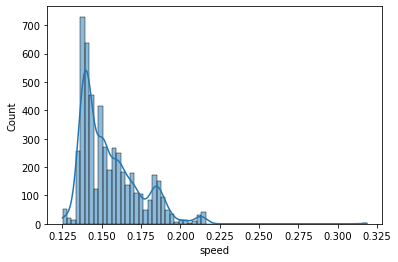

In [11]:
sns.histplot(flightRestricted.speed, kde=True)
plt.show()

Again, the distribution is basically the same. I'm comfortable saying at this point that some planes do, in fact, have significantly different speeds. This will probably be something worth including in the prediction model.

Save the results to a csv for future use

In [18]:
# Make the tail number the index
planeSpeed.to_csv('../data/plane_speed.csv', index=False)